In [260]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib as plt
import statsmodels.api as sm


pd.set_option('display.max_columns', None)

In [261]:
origin_p = pd.read_csv('./refugee-data/origin_only.csv')
del origin_p['Unnamed: 0']
origin_p.head()

,Year,Origin,Percentage
0,1970,Democratic Republic of the Congo,148.230332
1,1971,Democratic Republic of the Congo,605.043096
2,1972,Democratic Republic of the Congo,-138.785989
3,1973,Democratic Republic of the Congo,-53.456813
4,1974,Democratic Republic of the Congo,206.840271


In [262]:
time2 = pd.read_csv('./refugee-data/time_series.csv', low_memory=False)
time = time2[(time2.Year < 2016) & (time2.Year > 1969) & 
            (time2['Population type'] != 'Returnees') &
            (time2['Population type'] != 'Others of concern') & 
             (time2['Population type'] != 'Returned IDPs') &
            (time2['Population type'] != 'Stateless')]
time.head()

,Year,Country / territory of asylum/residence,Origin,Population type,Value
644,1970,Argentina,Various/Unknown,Refugees (incl. refugee-like situations),35000
645,1970,Australia,Various/Unknown,Refugees (incl. refugee-like situations),42000
646,1970,Austria,Various/Unknown,Refugees (incl. refugee-like situations),25300
647,1970,Burundi,Dem. Rep. of the Congo,Refugees (incl. refugee-like situations),7000
649,1970,Burundi,Rwanda,Refugees (incl. refugee-like situations),31800


In [263]:
refugee_increase = pd.read_csv('./refugee-data/per_origin/2015_no_destination3.csv')
del refugee_increase['Unnamed: 0']
refugee_increase.head()

,Year,Origin,Refugees_increase
0,1970,Various/Unknown,-27547
1,1970,Dem. Rep. of the Congo,-2880
2,1970,Congo,0
3,1970,Rwanda,-2880
4,1970,Nigeria,-2850


In [264]:
time['Population type'].unique()

array(['Refugees (incl. refugee-like situations)',
       'Internally displaced persons', 'Asylum-seekers'], dtype=object)

In [265]:
total_terrorism2 = pd.read_csv('./terrorism/terrorism_total.csv', low_memory=False)
del total_terrorism2['Unnamed: 0']
del total_terrorism2['Unnamed: 0.1']
total_terrorism = total_terrorism2[total_terrorism2.iyear < 2016]
total_terrorism.head()

totals = total_terrorism.copy()

totals.iyear = pd.to_datetime(totals.iyear, format='%Y')


In [23]:
totals.to_csv('kepler.csv')

In [266]:
terrorism_p = pd.read_csv('./terrorism/Central Asia_perc.csv')
del terrorism_p['Unnamed: 0']
terrorism_p.head()

#year 

,Year,region,Percentage
0,1970,Central America & Caribbean,-96.952694
1,1971,Central America & Caribbean,-97.823353
2,1972,Central America & Caribbean,-98.694012
3,1973,Central America & Caribbean,-97.388024
4,1974,Central America & Caribbean,-95.211377


In [267]:
#terr_country_year = total_terrorism.pivot_table(index = 'country_txt', 
                                             #   columns = 'success',
                                              #  aggfunc = 'count')
#pd.set_option('display.max_rows', None)                               
#terr_country_year.fillna(0)

In [268]:
years = total_terrorism.iyear.unique()
years

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015])

In [269]:

subset = total_terrorism[['iyear', 'success']]


year_terrorism = subset.groupby('iyear').count()
year_terrorism2 = year_terrorism.reset_index()
mean = year_terrorism['success'].mean()
mean
percentages = []

for year in years: 
    current2 = year_terrorism2[year_terrorism2['iyear'] == year]['success']
    current = current2.values[0]
    #print(current)
    percentage = (current - mean)/mean*100
    percentages.append(percentage)
    


In [270]:
mean_terr = pd.DataFrame({'Year': years, 'Attacks % from mean': percentages})

mean_terr.Year = pd.to_datetime(mean_terr.Year, format='%Y')
mean_terr.index = pd.DatetimeIndex(mean_terr['Year'])

del mean_terr['Year']

#mean_terr

In [271]:
sub_set = refugee_increase[['Year', 'Refugees_increase']]

sub_set2 = sub_set.groupby('Year').sum()

sub_set3 = sub_set2.reset_index()
mean = sub_set3['Refugees_increase'].mean()

percentages = []

for year in years:
    current2 = sub_set3[sub_set3['Year'] == year]['Refugees_increase']

    current = current2.values[0]

    percentage = (current - mean)/mean*100
    percentages.append(percentage)

refugee = pd.DataFrame({'Year': years, 'Refugees % from mean': percentages})
refugee.Year = pd.to_datetime(refugee.Year, format='%Y')
refugee.index = pd.DatetimeIndex(refugee['Year'])

del refugee['Year']

#refugee

In [272]:
merged = pd.merge(refugee, mean_terr, left_index=True, right_index=True)
#merged

In [273]:

# % attacks

# super dependend on each other 

ttest_ind(merged['Refugees % from mean'], merged['Attacks % from mean'], equal_var=False)

Ttest_indResult(statistic=-0.07663591372511573, pvalue=0.9391688124037553)

In [274]:
X = merged['Refugees % from mean']
Y = merged['Attacks % from mean']

R2 0.598


Text(0.5, 1.0, 'Increase of Attacks vs Increase of Refugees')

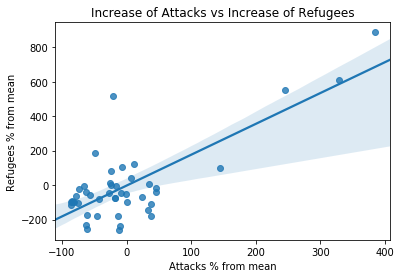

In [291]:
model = sm.OLS(Y,X)
results = model.fit()
predictions = results.predict(X)

print('R2', 0.598)

sns.regplot(Y, X).set_title('Increase of Attacks vs Increase of Refugees')


In [278]:

correrlation = merged['Refugees % from mean'].corr(merged['Attacks % from mean'])
correrlation

0.7732824955723034

In [279]:
#for successfull attacks 

selection = total_terrorism[total_terrorism.success == 1]
subset = selection[['iyear', 'success']]

year_terrorism = subset.groupby('iyear').count()

year_terrorism2 = year_terrorism.reset_index()
mean = year_terrorism['success'].mean()
mean
percentages = []

for year in years: 
    current2 = year_terrorism2[year_terrorism2['iyear'] == year]['success']
    current = current2.values[0]
    #print(current)
    percentage = (current - mean)/mean*100
    percentages.append(percentage)
    
mean_succ = pd.DataFrame({'Year': years, 'Attacks % from mean': percentages})

mean_succ.Year = pd.to_datetime(mean_succ.Year, format='%Y')
mean_succ.index = pd.DatetimeIndex(mean_succ['Year'])

del mean_succ['Year']

Ttest_indResult(statistic=-0.07705198602074814, pvalue=0.9388436594490437)
R2 = 0.595
correlation 0.7712318049147571


Text(0.5, 1.0, 'Increase of  Successfull Attacks vs Increase of Refugees')

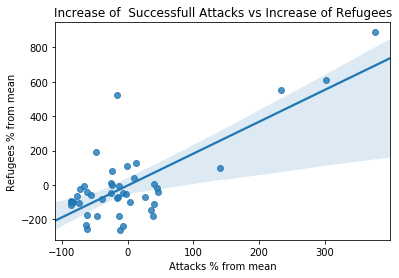

In [289]:
success = pd.merge(refugee, mean_succ, left_index=True, right_index=True)
print(ttest_ind(success['Refugees % from mean'], success['Attacks % from mean'], equal_var=False))

X2 = success['Refugees % from mean']
Y2 = success['Attacks % from mean']

model = sm.OLS(Y2,X2)
results = model.fit()
predictions2 = results.predict(X2)

print('R2 =', 0.595)

print('correlation', success['Refugees % from mean'].corr(success['Attacks % from mean']))
sns.regplot(Y2, X2).set_title('Increase of  Successfull Attacks vs Increase of Refugees')



Ttest_indResult(statistic=-0.07175507599253758, pvalue=0.9429967844280446)
R2 0.575
correlation 0.758239573484679


Text(0.5, 1.0, 'Increase of Unsuccessful Attacks vs Increase of Refugees')

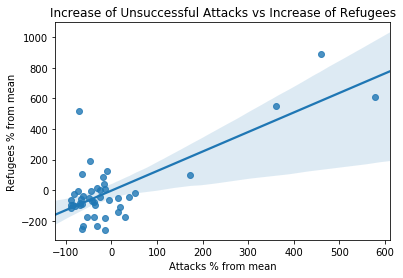

In [295]:

#for unsuccessfull attacks 

selection2 = total_terrorism[total_terrorism.success != 1]
subset = selection2[['iyear', 'success']]

year_terrorism = subset.groupby('iyear').count()

year_terrorism2 = year_terrorism.reset_index()
mean = year_terrorism['success'].mean()
mean
percentages = []

for year in years: 
    current2 = year_terrorism2[year_terrorism2['iyear'] == year]['success']
    current = current2.values[0]
    #print(current)
    percentage = (current - mean)/mean*100
    percentages.append(percentage)
    
mean_unsucc = pd.DataFrame({'Year': years, 'Attacks % from mean': percentages})

mean_unsucc.Year = pd.to_datetime(mean_unsucc.Year, format='%Y')
mean_unsucc.index = pd.DatetimeIndex(mean_unsucc['Year'])

del mean_unsucc['Year']



success = pd.merge(refugee, mean_unsucc, left_index=True, right_index=True)
print(ttest_ind(success['Refugees % from mean'], success['Attacks % from mean'], equal_var=False))

X3 = success['Refugees % from mean']
Y3 = success['Attacks % from mean']

model = sm.OLS(Y3,X3)
results = model.fit()
predictions2 = results.predict(X3)

print('R2', 0.575)

print('correlation', success['Refugees % from mean'].corr(success['Attacks % from mean']))

sns.regplot(Y3, X3, fit_reg = True).set_title('Increase of Unsuccessful Attacks vs Increase of Refugees')


In [247]:
total_terrorism.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,N

In [238]:
attack_types = total_terrorism.attacktype1_txt.unique()
attack_types

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

Ttest_indResult(statistic=-8.763178168338092, pvalue=3.322218380988172e-11)
R2 = 0.053
correlation 0.3977274573895482


Text(0.5, 1.0, 'Increase of Assassination type Attacks vs Increase of Refugees')

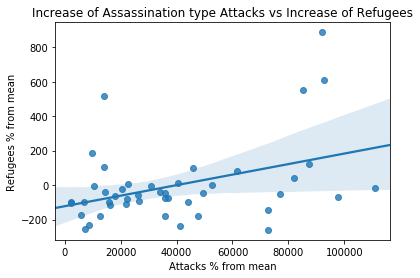

In [329]:
selection2 = total_terrorism[total_terrorism.attacktype1_txt == 'Assassination']
subset = selection2[['iyear', 'eventid']]

year_terrorism = subset.groupby('iyear').count()


year_terrorism2 = year_terrorism.reset_index()

mean = (year_terrorism['eventid'].count())/len(years)
mean
percentages = []

for year in years: 
    current2 = year_terrorism2[year_terrorism2['iyear'] == year]['eventid']
    current = current2.values[0]
    percentage = (current - mean)/mean*100
    percentages.append(percentage)
    
mean_unsucc = pd.DataFrame({'Year': years, 'Attacks % from mean': percentages})

mean_unsucc.Year = pd.to_datetime(mean_unsucc.Year, format='%Y')
mean_unsucc.index = pd.DatetimeIndex(mean_unsucc['Year'])

del mean_unsucc['Year']



success = pd.merge(refugee, mean_unsucc, left_index=True, right_index=True)
print(ttest_ind(success['Refugees % from mean'], success['Attacks % from mean'], equal_var=False))

X3 = success['Refugees % from mean']
Y3 = success['Attacks % from mean']

model = sm.OLS(Y3,X3)
results = model.fit()
predictions2 = results.predict(X3)

print('R2 =', 0.053)


print('correlation', success['Refugees % from mean'].corr(success['Attacks % from mean']))

sns.regplot(Y3, X3, fit_reg = True).set_title('Increase of Assassination type Attacks vs Increase of Refugees')



Ttest_indResult(statistic=-5.04913675553178, pvalue=8.193509282061738e-06)
R2 = 0.369
correlation 0.7730836497454859


Text(0.5, 1.0, 'Increase of Hostage Taking (Kidnapping) type Attacks vs Increase of Refugees')

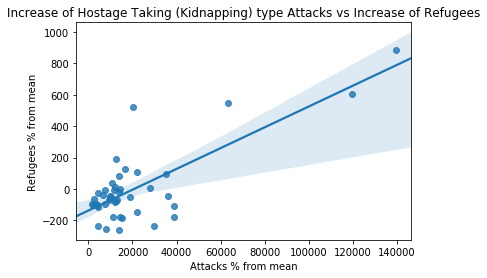

In [359]:
selection2 = total_terrorism[total_terrorism.attacktype1_txt == 'Hostage Taking (Kidnapping)']
subset = selection2[['iyear', 'eventid']]

year_terrorism = subset.groupby('iyear').count()


year_terrorism2 = year_terrorism.reset_index()

mean = (year_terrorism['eventid'].count())/len(years)
mean
percentages = []

for year in years: 
    current2 = year_terrorism2[year_terrorism2['iyear'] == year]['eventid']
    current = current2.values[0]
    percentage = (current - mean)/mean*100
    percentages.append(percentage)
    
mean_unsucc = pd.DataFrame({'Year': years, 'Attacks % from mean': percentages})

mean_unsucc.Year = pd.to_datetime(mean_unsucc.Year, format='%Y')
mean_unsucc.index = pd.DatetimeIndex(mean_unsucc['Year'])

del mean_unsucc['Year']

success = pd.merge(refugee, mean_unsucc, left_index=True, right_index=True)
print(ttest_ind(success['Refugees % from mean'], success['Attacks % from mean'], equal_var=False))

X4 = success['Refugees % from mean']
Y4 = success['Attacks % from mean']

model = sm.OLS(Y4,X4)
results = model.fit()
predictions2 = results.predict(X4)

print('R2 =', 0.369)

print('correlation', success['Refugees % from mean'].corr(success['Attacks % from mean']))

sns.regplot(Y4, X4).set_title('Increase of Hostage Taking (Kidnapping) type Attacks vs Increase of Refugees')




Ttest_indResult(statistic=-6.074422359634894, pvalue=2.6231805551221265e-07)
R2 = 0.33
correlation 0.7899684627167315


Text(0.5, 1.0, 'Increase of Bombing/Explosion type Attacks vs Increase of Refugees')

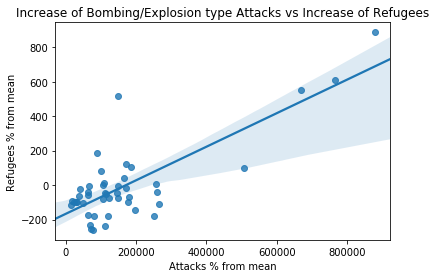

In [361]:
selection2 = total_terrorism[total_terrorism.attacktype1_txt == 'Bombing/Explosion']
subset = selection2[['iyear', 'eventid']]

year_terrorism = subset.groupby('iyear').count()


year_terrorism2 = year_terrorism.reset_index()

mean = (year_terrorism['eventid'].count())/len(years)
mean
percentages = []

for year in years: 
    current2 = year_terrorism2[year_terrorism2['iyear'] == year]['eventid']
    current = current2.values[0]
    percentage = (current - mean)/mean*100
    percentages.append(percentage)
    
mean_unsucc = pd.DataFrame({'Year': years, 'Attacks % from mean': percentages})

mean_unsucc.Year = pd.to_datetime(mean_unsucc.Year, format='%Y')
mean_unsucc.index = pd.DatetimeIndex(mean_unsucc['Year'])

del mean_unsucc['Year']



success = pd.merge(refugee, mean_unsucc, left_index=True, right_index=True)
print(ttest_ind(success['Refugees % from mean'], success['Attacks % from mean'], equal_var=False))

X3 = success['Refugees % from mean']
Y3 = success['Attacks % from mean']

model = sm.OLS(Y3,X3)
results = model.fit()
predictions2 = results.predict(X3)

print('R2 =', 0.330)

print('correlation', success['Refugees % from mean'].corr(success['Attacks % from mean']))

sns.regplot(Y3, X3).set_title('Increase of Bombing/Explosion type Attacks vs Increase of Refugees')


Ttest_indResult(statistic=-8.054437567542601, pvalue=3.360433733472524e-10)
R2 = 0.169
correlation 0.6622698797979443


Text(0.5, 1.0, 'Increase of Facility/Infrastructure Attacks vs Increase of Refugees')

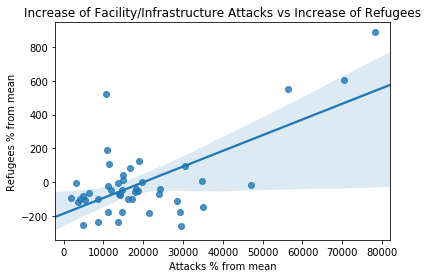

In [332]:
selection2 = total_terrorism[total_terrorism.attacktype1_txt == 'Facility/Infrastructure Attack']
subset = selection2[['iyear', 'eventid']]

year_terrorism = subset.groupby('iyear').count()


year_terrorism2 = year_terrorism.reset_index()

mean = (year_terrorism['eventid'].count())/len(years)
mean
percentages = []

for year in years: 
    current2 = year_terrorism2[year_terrorism2['iyear'] == year]['eventid']
    current = current2.values[0]
    percentage = (current - mean)/mean*100
    percentages.append(percentage)
    
mean_unsucc = pd.DataFrame({'Year': years, 'Attacks % from mean': percentages})

mean_unsucc.Year = pd.to_datetime(mean_unsucc.Year, format='%Y')
mean_unsucc.index = pd.DatetimeIndex(mean_unsucc['Year'])

del mean_unsucc['Year']



success = pd.merge(refugee, mean_unsucc, left_index=True, right_index=True)
print(ttest_ind(success['Refugees % from mean'], success['Attacks % from mean'], equal_var=False))

X3 = success['Refugees % from mean']
Y3 = success['Attacks % from mean']

model = sm.OLS(Y3,X3)
results = model.fit()
predictions2 = results.predict(X3)

print('R2 =', 0.169)


print('correlation', success['Refugees % from mean'].corr(success['Attacks % from mean']))

sns.regplot(Y3, X3, fit_reg = True).set_title('Increase of Facility/Infrastructure Attacks vs Increase of Refugees')



Ttest_indResult(statistic=-6.652891916948169, pvalue=3.6956683829976e-08)
R2 = 0.279
correlation 0.7611184043757914


Text(0.5, 1.0, 'Increase of Armed Assault type of Attacks vs Increase of Refugees')

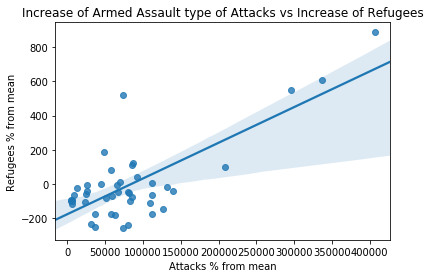

In [336]:
selection2 = total_terrorism[total_terrorism.attacktype1_txt == 'Armed Assault']
subset = selection2[['iyear', 'eventid']]

year_terrorism = subset.groupby('iyear').count()


year_terrorism2 = year_terrorism.reset_index()

mean = (year_terrorism['eventid'].count())/len(years)
mean
percentages = []

for year in years: 
    current2 = year_terrorism2[year_terrorism2['iyear'] == year]['eventid']
    current = current2.values[0]
    percentage = (current - mean)/mean*100
    percentages.append(percentage)
    
mean_unsucc = pd.DataFrame({'Year': years, 'Attacks % from mean': percentages})

mean_unsucc.Year = pd.to_datetime(mean_unsucc.Year, format='%Y')
mean_unsucc.index = pd.DatetimeIndex(mean_unsucc['Year'])

del mean_unsucc['Year']



success = pd.merge(refugee, mean_unsucc, left_index=True, right_index=True)
print(ttest_ind(success['Refugees % from mean'], success['Attacks % from mean'], equal_var=False))

X3 = success['Refugees % from mean']
Y3 = success['Attacks % from mean']

model = sm.OLS(Y3,X3)
results = model.fit()
predictions2 = results.predict(X3)

print('R2 =', 0.279)


print('correlation', success['Refugees % from mean'].corr(success['Attacks % from mean']))

sns.regplot(Y3, X3, fit_reg = True).set_title('Increase of Armed Assault type of Attacks vs Increase of Refugees')


Ttest_indResult(statistic=-6.979085120771672, pvalue=8.049589588392081e-09)
R2 = 0.279
correlation 0.39719282814707996


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Attacks % from mean   R-squared (uncentered):                   0.068
Model:                             OLS   Adj. R-squared (uncentered):              0.047
Method:                  Least Squares   F-statistic:                              3.234
Date:                 Thu, 07 Nov 2019   Prob (F-statistic):                      0.0790
Time:                         15:26:34   Log-Likelihood:                         -394.09
No. Observations:                   45   AIC:                                      790.2
Df Residuals:                       44   BIC:                                      792.0
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Refugees % from mean     1.8349      1.020      1.798      0.079      -0.221       3.891
==============================================================================
Omnibus:                        5.489   Durbin-Watson:                   0.350
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                4.878
Skew:                           0.806   Prob(JB):                       0.0873
Kurtosis:                       3.075   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

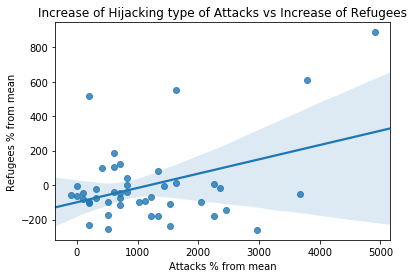

In [351]:
selection2 = total_terrorism[total_terrorism.attacktype1_txt == 'Hijacking']
subset = selection2[['iyear', 'eventid']]

year_terrorism = subset.groupby('iyear').count()


year_terrorism2 = year_terrorism.reset_index()

mean = (year_terrorism['eventid'].count())/len(years)
mean
percentages = []

for year in years: 
    current2 = year_terrorism2[year_terrorism2['iyear'] == year]['eventid']

    if len(current2) > 0: 
        current = current2.values[0]
    else:
        current = 0
    
    percentage = (current - mean)/mean*100
    percentages.append(percentage)
    
mean_unsucc = pd.DataFrame({'Year': years, 'Attacks % from mean': percentages})

mean_unsucc.Year = pd.to_datetime(mean_unsucc.Year, format='%Y')
mean_unsucc.index = pd.DatetimeIndex(mean_unsucc['Year'])

del mean_unsucc['Year']

success = pd.merge(refugee, mean_unsucc, left_index=True, right_index=True)
print(ttest_ind(success['Refugees % from mean'], success['Attacks % from mean'], equal_var=False))

X3 = success['Refugees % from mean']
Y3 = success['Attacks % from mean']

model = sm.OLS(Y3,X3)
results = model.fit()
predictions2 = results.predict(X3)

print('R2 =', 0.279)

print('correlation', success['Refugees % from mean'].corr(success['Attacks % from mean']))

sns.regplot(Y3, X3, fit_reg = True).set_title('Increase of Hijacking type of Attacks vs Increase of Refugees')

results.summary()



Ttest_indResult(statistic=-5.017350883953017, pvalue=8.812514696173448e-06)
R2 = 0.279
correlation 0.28472747046100905


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Attacks % from mean   R-squared (uncentered):                   0.048
Model:                             OLS   Adj. R-squared (uncentered):              0.026
Method:                  Least Squares   F-statistic:                              2.222
Date:                 Thu, 07 Nov 2019   Prob (F-statistic):                       0.143
Time:                         15:27:08   Log-Likelihood:                         -426.46
No. Observations:                   45   AIC:                                      854.9
Df Residuals:                       44   BIC:                                      856.7
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Refugees % from mean     3.1224      2.095      1.491      0.143      -1.099       7.344
==============================================================================
Omnibus:                       38.382   Durbin-Watson:                   0.513
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.999
Skew:                           2.284   Prob(JB):                     2.14e-24
Kurtosis:                       9.104   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

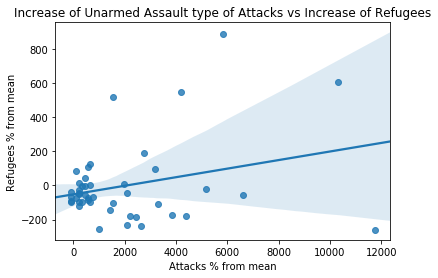

In [352]:
selection2 = total_terrorism[total_terrorism.attacktype1_txt == 'Unarmed Assault']
subset = selection2[['iyear', 'eventid']]

year_terrorism = subset.groupby('iyear').count()


year_terrorism2 = year_terrorism.reset_index()

mean = (year_terrorism['eventid'].count())/len(years)
mean
percentages = []

for year in years: 
    current2 = year_terrorism2[year_terrorism2['iyear'] == year]['eventid']

    if len(current2) > 0: 
        current = current2.values[0]
    else:
        current = 0
    
    percentage = (current - mean)/mean*100
    percentages.append(percentage)
    
mean_unsucc = pd.DataFrame({'Year': years, 'Attacks % from mean': percentages})

mean_unsucc.Year = pd.to_datetime(mean_unsucc.Year, format='%Y')
mean_unsucc.index = pd.DatetimeIndex(mean_unsucc['Year'])

del mean_unsucc['Year']

success = pd.merge(refugee, mean_unsucc, left_index=True, right_index=True)
print(ttest_ind(success['Refugees % from mean'], success['Attacks % from mean'], equal_var=False))

X3 = success['Refugees % from mean']
Y3 = success['Attacks % from mean']

model = sm.OLS(Y3,X3)
results = model.fit()
predictions2 = results.predict(X3)

print('R2 =', 0.279)

print('correlation', success['Refugees % from mean'].corr(success['Attacks % from mean']))

sns.regplot(Y3, X3, fit_reg = True).set_title('Increase of Unarmed Assault type of Attacks vs Increase of Refugees')

results.summary()

Ttest_indResult(statistic=-5.984131670286069, pvalue=3.280048956928229e-07)
R2 = 0.279
correlation 0.4289597146867805


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Attacks % from mean   R-squared (uncentered):                   0.096
Model:                             OLS   Adj. R-squared (uncentered):              0.075
Method:                  Least Squares   F-statistic:                              4.657
Date:                 Thu, 07 Nov 2019   Prob (F-statistic):                      0.0364
Time:                         15:30:52   Log-Likelihood:                         -418.58
No. Observations:                   45   AIC:                                      839.2
Df Residuals:                       44   BIC:                                      841.0
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Refugees % from mean     3.7938      1.758      2.158      0.036       0.251       7.337
==============================================================================
Omnibus:                       13.318   Durbin-Watson:                   0.349
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.838
Skew:                           1.208   Prob(JB):                     0.000989
Kurtosis:                       4.242   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

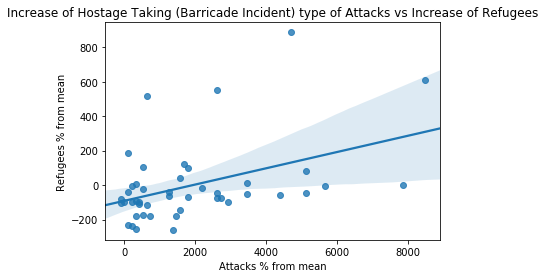

In [357]:
selection2 = total_terrorism[total_terrorism.attacktype1_txt == 'Hostage Taking (Barricade Incident)']
subset = selection2[['iyear', 'eventid']]



year_terrorism = subset.groupby('iyear').count()


year_terrorism2 = year_terrorism.reset_index()

mean = (year_terrorism['eventid'].count())/len(years)
mean
percentages = []

for year in years: 
    current2 = year_terrorism2[year_terrorism2['iyear'] == year]['eventid']

    if len(current2) > 0: 
        current = current2.values[0]
    else:
        current = 0
    
    percentage = (current - mean)/mean*100
    percentages.append(percentage)
    
mean_unsucc = pd.DataFrame({'Year': years, 'Attacks % from mean': percentages})

mean_unsucc.Year = pd.to_datetime(mean_unsucc.Year, format='%Y')
mean_unsucc.index = pd.DatetimeIndex(mean_unsucc['Year'])

del mean_unsucc['Year']

success = pd.merge(refugee, mean_unsucc, left_index=True, right_index=True)
print(ttest_ind(success['Refugees % from mean'], success['Attacks % from mean'], equal_var=False))

X3 = success['Refugees % from mean']
Y3 = success['Attacks % from mean']

model = sm.OLS(Y3,X3)
results = model.fit()
predictions2 = results.predict(X3)

print('R2 =', 0.279)

print('correlation', success['Refugees % from mean'].corr(success['Attacks % from mean']))

sns.regplot(Y3, X3, fit_reg = True).set_title('Increase of Hostage Taking (Barricade Incident) type of Attacks vs Increase of Refugees')

results.summary()



In [ ]:
'''

from scipy.stats import ttest_ind

# nr of attacks 


ttest_ind(stat['Nr. of refugees'], stat['Nr. of attacks'], equal_var=False)

'''


In [ ]:
#percentages 

#attacks

In [ ]:

#stat_p

In [ ]:
# percentage tov vorig jaar 

In [ ]:
#ttest_ind(stat_p['Nr. of refugees'], stat_p['Nr. of attacks'], equal_var=False)

# stijging terrorism == stijging vluchtelingen 


In [219]:
country_region = {'Canada':'North America',
                 'Mexico':'North America',
                 'United States':'North America',
                 'Antigua and Barbuda':'Central America & Caribbean',
                 'Bahamas':'Central America & Caribbean',
                 'Belize':'Central America & Caribbean',
                 'Cayman Islands':'Central America & Caribbean',
                 'Costa Rica':'Central America & Caribbean',
                 'Cuba':'Central America & Caribbean',
                 'Dominica':'Central America & Caribbean',
                 'Dominican Republic':'Central America & Caribbean',
                 'El Salvador':'Central America & Caribbean',
                 'Grenada':'Central America & Caribbean',
                 'Guadeloupe':'Central America & Caribbean',
                 'Guatemala':'Central America & Caribbean',
                 'Haiti':'Central America & Caribbean',
                 'Honduras':'Central America & Caribbean',
                 'Jamaica':'Central America & Caribbean',
                 'Martinique':'Central America & Caribbean',
                 'Nicaragua':'Central America & Caribbean',
                 'Panama':'Central America & Caribbean',
                 'Saint Kitts and Nevis':'Central America & Caribbean',
                 'Trinidad and Tobago':'Central America & Caribbean',
                 'Argentina':'South America',
                 'Bolivia':'South America',
                 'Brazil':'South America',
                 'Chile':'South America',
                 'Colombia':'South America',
                 'Ecuador':'South America',
                 'Falkland Islands':'South America',
                 'French Guiana':'South America',
                 'Guyana':'South America',
                 'Paraguay':'South America',
                 'Peru':'South America',
                 'Suriname':'South America',
                 'Uruguay':'South America',
                 'Venezuela':'South America',
                 'China':'East Asia',
                 'Hong Kong':'East Asia',
                 'Japan':'East Asia',
                 'Macau':'East Asia',
                 'North Korea':'East Asia',
                 'South Korea':'East Asia',
                 'Taiwan':'East Asia',
                 'Brunei':'Southeast Asia',
                 'Cambodia':'Southeast Asia',
                 'East Timor':'Southeast Asia',
                 'Indonesia':'Southeast Asia',
                 'Laos':'Southeast Asia',
                 'Malaysia':'Southeast Asia',
                 'Myanmar':'Southeast Asia',
                 'Philippines':'Southeast Asia',
                 'Singapore':'Southeast Asia',
                 'Vietnam':'Southeast Asia',
                 'Thailand':'Southeast Asia',
                 'Afghanistan':'South Asia',
                 'Bangladesh':'South Asia',
                 'Buthan':'South Asia',
                 'India':'South Asia',
                 'Maladives':'South Asia',
                 'Nepal':'South Asia',
                 'Pakistan':'South Asia',
                 'Sri Lanka':'South Asia',
                 'Armenia':'Central Asia',
                 'Azerbaijan':'Central Asia',
                 'Georgia':'Central Asia',
                 'Kazakhstan':'Central Asia',
                 'Tajikistan':'Central Asia',
                 'Turkmenistan':'Central Asia',
                 'Uzbekistan':'Central Asia',
                 'Andorra':'Western Europe',
                 'Austria':'Western Europe',
                 'Belgium':'Western Europe',
                 'Cyprus':'Western Europe',
                 'Denmark':'Western Europe',
                 'Finland':'Western Europe',
                 'France':'Western Europe',
                 'Germany':'Western Europe',
                 'Gibraltar':'Western Europe',
                 'Greece':'Western Europe',
                 'Iceland':'Western Europe',
                 'Ireland':'Western Europe',
                 'Italy':'Western Europe',
                 'Luxembourg':'Western Europe',
                 'Malta':'Western Europe',
                 'Netherlands':'Western Europe',
                 'Norway':'Western Europe',
                 'Portugal':'Western Europe',
                 'Spain':'Western Europe',
                 'Sweden':'Western Europe',
                 'Switzerland':'Western Europe',
                 'United Kingdom':'Western Europe',
                 'Vatican City':'Western Europe',
                 'Albania':'Eastern Europe',
                 'Belarus':'Eastern Europe',
                 'Bosnia and Herzegovina':'Eastern Europe',
                 'Bulgaria':'Eastern Europe',
                 'Croatia':'Eastern Europe',
                 'Czech Republic':'Eastern Europe',
                 'Estonia':'Eastern Europe',
                 'Hungary':'Eastern Europe',
                 'Kosovo':'Eastern Europe',
                 'Latvia':'Eastern Europe',
                 'Lithuania':'Eastern Europe',
                 'Macedonia':'Eastern Europe',
                 'Moldova':'Eastern Europe',
                 'Montenegro':'Eastern Europe',
                 'Poland':'Eastern Europe',
                 'Romania':'Eastern Europe',
                 'Russia':'Eastern Europe',
                 'Serbia':'Eastern Europe',
                 'Slovakia':'Eastern Europe',
                 'Slovenia':'Eastern Europe',
                 'Ukraine':'Eastern Europe',
                 'Algeria':'Middle East & North Africa',
                 'Bahrain':'Middle East & North Africa',
                  'Egypt':'Middle East & North Africa',
                  'Iran':'Middle East & North Africa',
                  'Iraq':'Middle East & North Africa',
                  'Israel':'Middle East & North Africa',
                  'Jordan':'Middle East & North Africa',
                  'Kuwait':'Middle East & North Africa',
                  'Lebanon':'Middle East & North Africa',
                  'Libya':'Middle East & North Africa',
                  'Morocco':'Middle East & North Africa',
                  'Yemen':'Middle East & North Africa',
                  'Qatar':'Middle East & North Africa',
                  'Saudi Arabia':'Middle East & North Africa',
                  'Syria':'Middle East & North Africa',
                  'Tunisia':'Middle East & North Africa',
                  'Turkey':'Middle East & North Africa',
                  'United Arab Emirates':'Middle East & North Africa',
                  'Palestina':'Middle East & North Africa',
                  'Western Sahara':'Middle East & North Africa',
                  'Angola':'Sub-Saharan Africa',
                  'Benin':'Sub-Saharan Africa',
                  'Botswana':'Sub-Saharan Africa',
                  'Burkina Faso':'Sub-Saharan Africa',
                  'Burundi':'Sub-Saharan Africa',
                  'Central African Republic':'Sub-Saharan Africa',
                  'Chad':'Sub-Saharan Africa',
                  'Comoros':'Sub-Saharan Africa',
                  'Democratic Republic of the Congo':'Sub-Saharan Africa',
                  'Djibouti':'Sub-Saharan Africa',
                  'Equatorial Guinea':'Sub-Saharan Africa',
                  'Eritrea':'Sub-Saharan Africa',
                  'Ethiopia':'Sub-Saharan Africa',
                  'Gabon':'Sub-Saharan Africa',
                  'Gambia':'Sub-Saharan Africa',
                  'Ghana':'Sub-Saharan Africa',
                  'Guinea':'Sub-Saharan Africa',
                  'Guinea-Bissau':'Sub-Saharan Africa',
                  'Côre d\'Ivore':'Sub-Saharan Africa',
                  'Kenya':'Sub-Saharan Africa',
                  'Lesotho':'Sub-Saharan Africa',
                  'Liberia':'Sub-Saharan Africa',
                  'Madagascar':'Sub-Saharan Africa',
                  'Malawi':'Sub-Saharan Africa',
                  'Mali':'Sub-Saharan Africa',
                  'Mauritnia':'Sub-Saharan Africa',
                  'Mozambique':'Sub-Saharan Africa',
                  'Namibia':'Sub-Saharan Africa',
                  'Niger':'Sub-Saharan Africa',
                  'Nigeria':'Sub-Saharan Africa',
                  'Republic of the Congo':'Sub-Saharan Africa',
                  'Rwanda':'Sub-Saharan Africa',
                  'Senegal':'Sub-Saharan Africa',
                  'Seychelles':'Sub-Saharan Africa',
                  'Sierra Leone':'Sub-Saharan Africa',
                  'Somalia':'Sub-Saharan Africa',
                  'South Africa':'Sub-Saharan Africa',
                  'South Sudan':'Sub-Saharan Africa',
                  'Sudan':'Sub-Saharan Africa',
                  'Swaziland':'Sub-Saharan Africa',
                  'Tanzania':'Sub-Saharan Africa',
                  'Togo':'Sub-Saharan Africa',
                  'Uganda':'Sub-Saharan Africa',
                  'Zambia':'Sub-Saharan Africa',
                  'Zimbabwe':'Sub-Saharan Africa',
                  'Australia':'Australasia & Oceania',
                  'Fiji':'Australasia & Oceania',
                  'French Polynesia':'Australasia & Oceania',
                  'New Caledonia':'Australasia & Oceania',
                  'New Zealand':'Australasia & Oceania',
                  'Papua New Guinea':'Australasia & Oceania',
                  'Solomon Islands':'Australasia & Oceania',
                  'Vanuatu':'Australasia & Oceania',
                  'Wallis and Futuna Islands':'Australasia & Oceania'}



In [40]:
region_ref = refugee_increase.copy()

In [41]:
ref2 = region_ref.replace(country_region) 

In [42]:
ref2['Origin'].unique()

array(['Various/Unknown', 'Dem. Rep. of the Congo', 'Congo',
       'Sub-Saharan Africa', 'Central Asia', 'Western Europe', 'Tibetan',
       'Viet Nam', 'Middle East & North Africa', 'Syrian Arab Rep.',
       'East Asia', 'Cabo Verde', 'Eastern Europe',
       'Serbia and Kosovo (S/RES/1244 (1999))',
       'Central America & Caribbean', 'Czech Rep.', 'Russian Federation',
       'Bolivia (Plurinational State of)', 'South America',
       'Southeast Asia', 'South Asia', 'United Rep. of Tanzania',
       "Lao People's Dem. Rep.", 'Palestinian', 'Dominican Rep.',
       'Iran (Islamic Rep. of)', 'Stateless', 'Central African Rep.',
       'Mauritania', 'Sao Tome and Principe', "Côte d'Ivoire", 'Maldives',
       'Cameroon', 'Mongolia', 'United States of America',
       'Australasia & Oceania', 'Rep. of Korea', 'Bhutan',
       'North America', 'Venezuela (Bolivarian Republic of)',
       'China, Hong Kong SAR', 'Rep. of Moldova', 'Kyrgyzstan',
       'The former Yugoslav Republic of M

In [43]:
refugee_region = ref2[(ref2.Origin == 'Sub-Saharan Africa') |
                     (ref2.Origin == 'Central Asia') |
                     (ref2.Origin == 'Western Europe') |
                     (ref2.Origin == 'East Asia') |
                     (ref2.Origin == 'Southeast Asia') |
                     (ref2.Origin == 'Middle East & North Africa') |
                     (ref2.Origin == 'Eastern Europe') | 
                     (ref2.Origin == 'Central America & Caribbean') | 
                     (ref2.Origin == 'South America') | 
                     (ref2.Origin == 'South Asia') | 
                     (ref2.Origin == 'North America') | 
                     (ref2.Origin == 'Australasia & Oceania')]

In [44]:
refugee_region

,Year,Origin,Refugees_increase
3,1970,Sub-Saharan Africa,-2880
4,1970,Sub-Saharan Africa,-2850
5,1970,Sub-Saharan Africa,2560
6,1970,Sub-Saharan Africa,5930
7,1970,Sub-Saharan Africa,-4000
...,...,...,...
10150,2015,Australasia & Oceania,0
10152,2015,Australasia & Oceania,0
10153,2015,Eastern Europe,1765
10157,2015,Sub-Saharan Africa,307857


In [45]:
region_ref_grouped = refugee_region.groupby(['Origin', 'Year'])['Refugees_increase'].sum()

region_ref = region_ref_grouped.reset_index()

In [224]:
region_ref_origin2 = region_ref.copy()

del region_ref_origin2['Year']

region_ref_origin = region_ref_origin2.groupby('Origin').mean()
region_ref_origin

,Refugees_increase
Origin,
Australasia & Oceania,43.891304
Central America & Caribbean,7179.869565
Central Asia,20684.391304
East Asia,4474.586957
Eastern Europe,47081.369565
Middle East & North Africa,177561.891304
North America,1261.021739
South America,158867.543478
South Asia,127916.543478


In [140]:


regions = region_ref.Origin.unique()

percentages = []
regions_dic = {}
i = 0

for region in regions:
    #print(region)
    mean = region_ref[region_ref.Origin == region]['Refugees_increase'].mean()
    #print(mean)
    for year in years:
        current2 = sub_set3[sub_set3['Year'] == year]['Refugees_increase']
        current = current2.values[0]
        percentage = (current - mean)/mean*100
        percentages.append(percentage)
        sub_dic = {}
        sub_dic['Year'] = year
        sub_dic['region'] = region
        sub_dic['Percentage_refugee'] = percentage
        
        regions_dic[i] = sub_dic
        i+=1
        
        
     

refugee_region2 = pd.DataFrame(regions_dic)
refugee_region = refugee_region2.T
#refugee_region.Year = pd.to_datetime(refugee.Year, format='%Y')
#refugee_region.index = pd.DatetimeIndex(refugee['Year'])

refugee_region

refugee_region.Year = pd.to_datetime(refugee_region.Year, format='%Y')
refugee_region.index = pd.DatetimeIndex(refugee_region['Year'])
del refugee_region['Year']
#efugee_region[refugee_region.region == 'Western Europe']

In [107]:
refugee_region.reset_index()

,Year,region,Percentage_refugee
0,1970-01-01,Australasia & Oceania,22849.9
1,1971-01-01,Australasia & Oceania,18081.3
2,1972-01-01,Australasia & Oceania,171734
3,1973-01-01,Australasia & Oceania,-466126
4,1974-01-01,Australasia & Oceania,87361.5
...,...,...,...
535,2011-01-01,Western Europe,-160030
536,2012-01-01,Western Europe,-541312
537,2013-01-01,Western Europe,-1.77906e+06
538,2014-01-01,Western Europe,-2.70512e+06


In [106]:
terrorism_p

#terrorism_p.Year = pd.to_datetime(terrorism_p.Year, format='%Y')
#terrorism_p.index = pd.DatetimeIndex(terrorism_p['Year'])

#del terrorism_p['Year']
terrorism_p[terrorism_p.region == 'Western Europe']

terrorism_p.reset_index()

,Year,region,Percentage
0,1970-01-01,Central America & Caribbean,-96.952694
1,1971-01-01,Central America & Caribbean,-97.823353
2,1972-01-01,Central America & Caribbean,-98.694012
3,1973-01-01,Central America & Caribbean,-97.388024
4,1974-01-01,Central America & Caribbean,-95.211377
...,...,...,...
535,2011-01-01,Central Asia,-24.860853
536,2012-01-01,Central Asia,0.185529
537,2013-01-01,Central Asia,-41.558442
538,2014-01-01,Central Asia,-24.860853


In [162]:


region_merged3 = pd.merge(terrorism_p, refugee_region, on=['region', 'Year'])

In [164]:
region_merged = region_merged3.rename(columns={"Percentage": "Terrorism attacks %", "Percentage_refugee": "Refugee %",
                             })
region_merged

,region,Terrorism attacks %,Refugee %
Year,,,
1970-01-01,Central America & Caribbean,-96.952694,40.295
1971-01-01,Central America & Caribbean,-97.823353,11.1441
1972-01-01,Central America & Caribbean,-98.694012,950.437
1973-01-01,Central America & Caribbean,-97.388024,-2948.87
1974-01-01,Central America & Caribbean,-95.211377,434.662
...,...,...,...
2011-01-01,Central Asia,-24.860853,3237.17
2012-01-01,Central Asia,0.185529,11193.1
2013-01-01,Central Asia,-41.558442,37020.6


In [165]:
Central_America_ref = region_merged[region_merged.region == 'Central America & Caribbean']
Australasia_ref = region_merged[region_merged.region == 'Australasia & Oceania']
Central_Asia_ref = region_merged[region_merged.region == 'Central Asia']
East_Asia_ref = region_merged[region_merged.region == 'East Asia']
EasternEurope_ref = region_merged[region_merged.region == 'Eastern Europe']
MiddelEast_NorthAfrica = region_merged[region_merged.region == 'Middle East & North Africa']
North_America_ref = region_merged[region_merged.region == 'North America']
South_America_ref = region_merged[region_merged.region == 'South America']
Southeast_Asia_ref = region_merged[region_merged.region == 'Southeast Asia']
SubSaharan_Africa_ref = region_merged[region_merged.region == 'Sub-Saharan Africa']
WesternEurope_ref = region_merged[region_merged.region == 'Western Europe']


Ttest_indResult(statistic=-2.8162135600282525, pvalue=0.0072466933608579046)
R2 = 0.006
correlation -0.0929414057485625


Text(0.5, 1.0, 'Central_America')

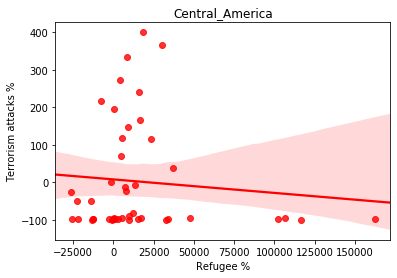

In [344]:
# central AMerca 
Central_America_ref2 = Central_America_ref.fillna(0)


print(ttest_ind(Central_America_ref2['Terrorism attacks %'], Central_America_ref2['Refugee %'], equal_var=False))

X3 = Central_America_ref2['Terrorism attacks %']
Y3 = Central_America_ref2['Refugee %']

model = sm.OLS(Y3,X3)
results = model.fit()
predictions2 = results.predict(X3)

print('R2 =', 0.006)

print('correlation', Central_America_ref2['Terrorism attacks %'].corr(Central_America_ref2['Refugee %']))

sns.regplot(Y3, X3, color= 'red').set_title('Central_America')




Ttest_indResult(statistic=-2.8342165123777185, pvalue=0.006911133428079022)
R2 =  0.006
correlation 0.008789471832914907


Text(0.5, 1.0, 'Australasia & Oceania')

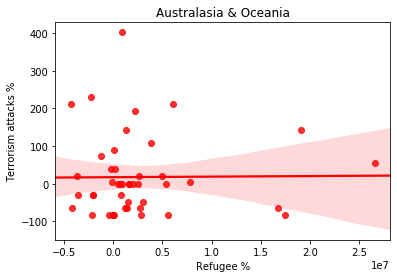

In [321]:
Australasia_ref2 = Australasia_ref.fillna(0)


print(ttest_ind(Australasia_ref2['Terrorism attacks %'], Australasia_ref2['Refugee %'], equal_var=False))

X3 = Australasia_ref2['Terrorism attacks %']
Y3 = Australasia_ref2['Refugee %']

model = sm.OLS(Y3,X3)
results = model.fit()
predictions2 = results.predict(X3)

print('R2 = ', 0.006)

print('correlation', Australasia_ref2['Terrorism attacks %'].corr(Australasia_ref2['Refugee %']))

sns.regplot(Y3, X3, color= 'red').set_title('Australasia & Oceania')



Ttest_indResult(statistic=-2.759351569603444, pvalue=0.008408193714756814)
R2 = 0.006
correlation 1.0


Text(0.5, 1.0, 'Central Asia')

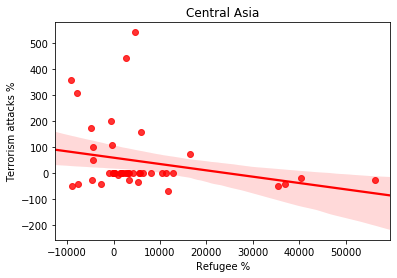

In [318]:
Central_Asia_ref2 = Central_Asia_ref.fillna(0)


print(ttest_ind(Central_Asia_ref2['Terrorism attacks %'], Central_Asia_ref2['Refugee %'], equal_var=False))

X3 = Central_Asia_ref2['Terrorism attacks %']
Y3 = Central_Asia_ref2['Refugee %']

model = sm.OLS(Y3,X3)
results = model.fit()
predictions2 = results.predict(X3)

print('R2 =', 0.006)

print('correlation', Central_Asia_ref2['Terrorism attacks %'].corr(Central_Asia_ref2['Terrorism attacks %']))

sns.regplot(Y3, X3, color= 'red').set_title('Central Asia')


Ttest_indResult(statistic=-2.822806547153045, pvalue=0.007122114600349008)
R2 = 0.01
correlation 0.09559169262669549


Text(0.5, 1.0, 'East Asia')

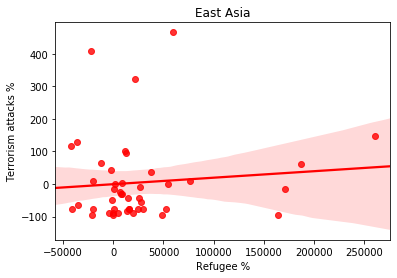

In [315]:
East_Asia_ref2 = East_Asia_ref.fillna(0)


print(ttest_ind(East_Asia_ref2['Terrorism attacks %'], East_Asia_ref2['Refugee %'], equal_var=False))

X3 = East_Asia_ref2['Terrorism attacks %']
Y3 = East_Asia_ref2['Refugee %']

model = sm.OLS(Y3,X3)
results = model.fit()
predictions2 = results.predict(X3)

print('R2 =', 0.010)

print('correlation', East_Asia_ref2['Terrorism attacks %'].corr(East_Asia_ref2['Refugee %']))

sns.regplot(Y3, X3, color= 'red').set_title('East Asia')




Ttest_indResult(statistic=-2.706702431220243, pvalue=0.00963087712224149)
R2 = 0.386
correlation 0.6508949078638471


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Refugee %   R-squared (uncentered):                   0.386
Model:                            OLS   Adj. R-squared (uncentered):              0.373
Method:                 Least Squares   F-statistic:                              27.72
Date:                Thu, 07 Nov 2019   Prob (F-statistic):                    4.00e-06
Time:                        14:48:23   Log-Likelihood:                         -445.60
No. Observations:                  45   AIC:                                      893.2
Df Residuals:                      44   BIC:                                      895.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Terrorism attacks %    23.0517      4.378      5.265      0.000      14.228      31.876
==============================================================================
Omnibus:                       11.113   Durbin-Watson:                   1.079
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               13.599
Skew:                           0.797   Prob(JB):                      0.00111
Kurtosis:                       5.170   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

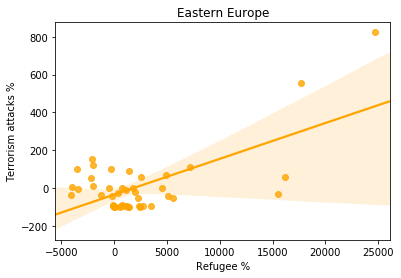

In [312]:
EasternEurope_ref2 = EasternEurope_ref.fillna(0)


print(ttest_ind(EasternEurope_ref2['Terrorism attacks %'], EasternEurope_ref2['Refugee %'], equal_var=False))

X3 = EasternEurope_ref2['Terrorism attacks %']
Y3 = EasternEurope_ref2['Refugee %']

model = sm.OLS(Y3,X3)
results = model.fit()
predictions2 = results.predict(X3)

print('R2 =', 0.386)

print('correlation', EasternEurope_ref2['Terrorism attacks %'].corr(EasternEurope_ref2['Refugee %']))

sns.regplot(Y3, X3, color= 'orange').set_title('Eastern Europe')
results.summary()


Ttest_indResult(statistic=-2.3829424534998966, pvalue=0.021459758072353216)
R2 = 0.591
correlation 0.8171418975423699


Text(0.5, 1.0, 'Middle East & North Africa')

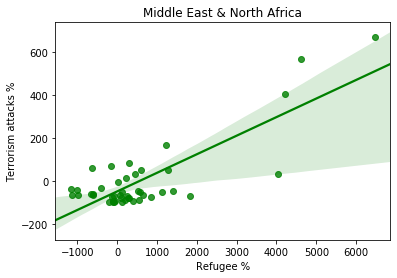

In [309]:
MiddelEast_NorthAfrica2 = MiddelEast_NorthAfrica.fillna(0)


print(ttest_ind(MiddelEast_NorthAfrica2['Terrorism attacks %'], MiddelEast_NorthAfrica2['Refugee %'], equal_var=False))

X3 = MiddelEast_NorthAfrica2['Terrorism attacks %']
Y3 = MiddelEast_NorthAfrica2['Refugee %']

model = sm.OLS(Y3,X3)
results = model.fit()
predictions2 = results.predict(X3)

print('R2 =', 0.591)

print('correlation', MiddelEast_NorthAfrica2['Terrorism attacks %'].corr(MiddelEast_NorthAfrica2['Refugee %']))

sns.regplot(Y3, X3, color= 'green').set_title('Middle East & North Africa')





Ttest_indResult(statistic=-2.8312322598657973, pvalue=0.0069657518341634155)
R2 = 0.032
correlation -0.19354360356272918


Text(0.5, 1.0, 'North America')

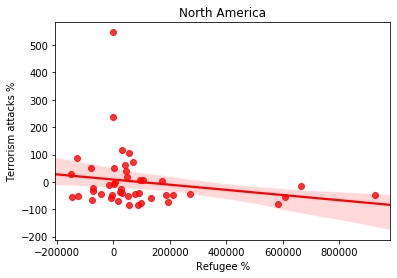

In [307]:
North_America_ref2 = North_America_ref.fillna(0)


print(ttest_ind(North_America_ref2['Terrorism attacks %'], North_America_ref2['Refugee %'], equal_var=False))

X3 = North_America_ref2['Terrorism attacks %']
Y3 = North_America_ref2['Refugee %']

model = sm.OLS(Y3,X3)
results = model.fit()
predictions2 = results.predict(X3)

print('R2 =', 0.032)

print('correlation', North_America_ref2['Terrorism attacks %'].corr(North_America_ref2['Refugee %']))

sns.regplot(Y3, X3, color= 'red').set_title('North America')





Ttest_indResult(statistic=-2.437336987797222, pvalue=0.018872169864956552)
R2 = 0.011
correlation -0.11245648352213806


Text(0.5, 1.0, 'South America')

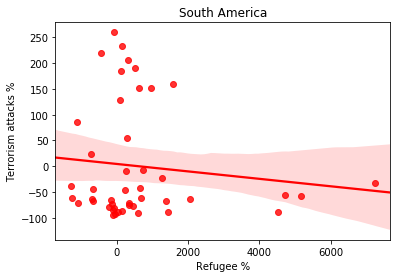

In [305]:
South_America_ref2 = South_America_ref.fillna(0)


print(ttest_ind(South_America_ref2['Terrorism attacks %'], South_America_ref2['Refugee %'], equal_var=False))

X3 = South_America_ref2['Terrorism attacks %']
Y3 = South_America_ref2['Refugee %']

model = sm.OLS(Y3,X3)
results = model.fit()
predictions2 = results.predict(X3)

print('R2 =', 0.011)

print('correlation', South_America_ref2['Terrorism attacks %'].corr(South_America_ref2['Refugee %']))

sns.regplot(Y3, X3, color= 'red').set_title('South America')




Ttest_indResult(statistic=-2.7771521197710376, pvalue=0.008027058521531783)
R2 = 0.478
correlation 0.7495069954944532


Text(0.5, 1.0, 'Southeast Asia')

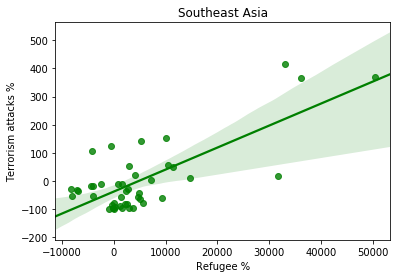

In [302]:

Southeast_Asia_ref2 = Southeast_Asia_ref.fillna(0)


print(ttest_ind(Southeast_Asia_ref2['Terrorism attacks %'], Southeast_Asia_ref2['Refugee %'], equal_var=False))

X3 = Southeast_Asia_ref2['Terrorism attacks %']
Y3 = Southeast_Asia_ref2['Refugee %']

model = sm.OLS(Y3,X3)
results = model.fit()
predictions2 = results.predict(X3)

print('R2 =', 0.478)

print('correlation', Southeast_Asia_ref2['Terrorism attacks %'].corr(Southeast_Asia_ref2['Refugee %']))

sns.regplot(Y3, X3, color= 'green').set_title('Southeast Asia')




Ttest_indResult(statistic=-2.149614321088132, pvalue=0.03687021792166965)
R2 = 0.524
correlation 0.7615858329800054


Text(0.5, 1.0, 'Sub-Saharan Africa')

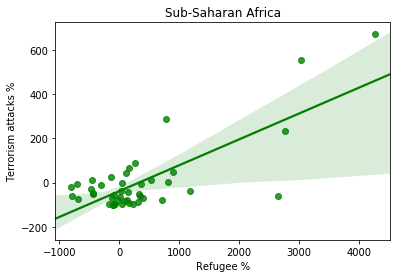

In [300]:
SubSaharan_Africa_ref2 = SubSaharan_Africa_ref.fillna(0)


print(ttest_ind(SubSaharan_Africa_ref2['Terrorism attacks %'], SubSaharan_Africa_ref2['Refugee %'], equal_var=False))

X3 = SubSaharan_Africa_ref2['Terrorism attacks %']
Y3 = SubSaharan_Africa_ref2['Refugee %']

model = sm.OLS(Y3,X3)
results = model.fit()
predictions2 = results.predict(X3)

print('R2 =', 0.524)

print('correlation', SubSaharan_Africa_ref2['Terrorism attacks %'].corr(SubSaharan_Africa_ref2['Refugee %']))


sns.regplot(Y3, X3, color= 'green').set_title('Sub-Saharan Africa')


Ttest_indResult(statistic=2.8354090083966317, pvalue=0.006889419048315794)
R2 = 0.007
correlation 0.08806170507806514


Text(0.5, 1.0, 'Western Europe')

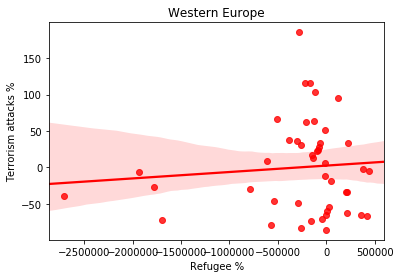

In [298]:
WesternEurope_ref2 = WesternEurope_ref.fillna(0)


print(ttest_ind(WesternEurope_ref2['Terrorism attacks %'], WesternEurope_ref2['Refugee %'], equal_var=False))

X3 = WesternEurope_ref2['Terrorism attacks %']
Y3 = WesternEurope_ref2['Refugee %']

model = sm.OLS(Y3,X3)
results = model.fit()
predictions2 = results.predict(X3)

print('R2 =', 0.007)

print('correlation', WesternEurope_ref2['Terrorism attacks %'].corr(WesternEurope_ref2['Refugee %']))



sns.regplot(Y3, X3, color= 'red').set_title('Western Europe')





In [225]:
country_region_CODE_tot = {'Canada':['North America' , 1261, 'CAN'],
                 'Mexico':['North America', 1261, 'MEX'],
                 'United States':['North America', 1261, 'USA'],
                 'Antigua and Barbuda':['Central America & Caribbean', 7180, 'ATG'],
                 'Bahamas':['Central America & Caribbean', 7180, 'BHM'],
                 'Belize':['Central America & Caribbean', 7180, 'BLZ'],
                 'Cayman Islands':['Central America & Caribbean', 7180, 'CYM'],
                 'Costa Rica':['Central America & Caribbean', 7180, 'CRI'],
                 'Cuba':['Central America & Caribbean', 7180, 'CUB'],
                 'Dominica':['Central America & Caribbean', 7180, 'DMA'],
                 'Dominican Republic':['Central America & Caribbean', 7180, 'DOM'],
                 'El Salvador':['Central America & Caribbean', 7180, 'SLV'],
                 'Grenada':['Central America & Caribbean', 7180, 'GRD'],
                 'Guatemala':['Central America & Caribbean', 7180, 'GMT'],
                 'Haiti':['Central America & Caribbean', 7180, 'HTI'],
                 'Honduras':['Central America & Caribbean', 7180, 'HND'],
                 'Jamaica':['Central America & Caribbean', 7180, 'JAM'],
                 'Nicaragua':['Central America & Caribbean', 7180, 'NIC'],
                 'Panama':['Central America & Caribbean', 7180, 'PAN'],
                 'Saint Kitts and Nevis':['Central America & Caribbean', 7180, 'KNA'],
                 'Trinidad and Tobago':['Central America & Caribbean', 7180, 'TTO'],
                 'Argentina':['South America', 158868, 'ARG'],
                 'Bolivia':['South America', 158868, 'BOL'],
                 'Brazil':['South America', 158868, 'BRA'],
                 'Chile':['South America', 158868, 'CHL'],
                 'Colombia':['South America', 158868, 'COL'],
                 'Ecuador':['South America',158868, 'ECU'],
                 'Falkland Islands':['South America', 158868, 'FLK'],
                 'Guyana':['South America', 158868, 'GUY'],
                 'Paraguay':['South America', 158868, 'PRY'],
                 'Peru':['South America', 158868, 'PER'],
                 'Suriname':['South America', 158868, 'SUR'],
                 'Uruguay':['South America', 158868, 'URY'],
                 'Venezuela':['South America', 158868, 'VEN'],
                 'China':['East Asia', 4475, 'CHN'],
                 'Hong Kong':['East Asia', 4475, 'HKG'],
                 'Japan':['East Asia', 4475, 'JPN'],
                 'Macau':['East Asia', 4475, 'MAC'],
                 'North Korea':['East Asia', 4475, 'PRK'],
                 'South Korea':['East Asia', 4475, 'KOR'],
                'Mongolia':['East Asia',4475, 'MNG'],
                 'Taiwan':['East Asia', 4475, 'TWN'],
                 'Brunei':['Southeast Asia', 23117, 'BRN'],
                 'Cambodia':['Southeast Asia', 23117, 'KHM'],
                 'East Timor':['Southeast Asia',23117, 'TLS'],
                 'Indonesia':['Southeast Asia', 23117, 'IDN'],
                 'Laos':['Southeast Asia', 23117, 'LAO'],
                 'Malaysia':['Southeast Asia', 23117, 'MYS'],
                'Myanmar':['Southeast Asia', 23117, 'MMR'],
                 'Philippines':['Southeast Asia', 23117, 'PHL'],
                 'Singapore':['Southeast Asia', 23117, 'SGP'],
                 'Vietnam':['Southeast Asia', 23117, 'VNM'],
                 'Thailand':['Southeast Asia', 23117, 'THA'],
                 'Afghanistan':['South Asia', 23117, 'AFG'],
                 'Bangladesh':['South Asia', 23117, 'BGD'],
                 'Buthan':['South Asia', 23117, 'AFG'],
                 'India':['South Asia', 23117, 'IND'],
                 'Maladives':['South Asia', 23117, 'MDV'],
                 'Nepal':['South Asia', 23117, 'NPL'],
                 'Pakistan':['South Asia', 23117, 'PAK'],
                 'Sri Lanka':['South Asia', 23117, 'LKA'],
                 'Armenia':['Central Asia', 20684, 'ARM'],
                 'Azerbaijan':['Central Asia',20684, 'AZE'],
                 'Georgia':['Central Asia', 20684, 'GEO'],
                 'Kazakhstan':['Central Asia', 20684, 'KAZ'],
                 'Tajikistan':['Central Asia', 20684, 'TJK'],
                 'Turkmenistan':['Central Asia', 20684, 'TKM'],
                 'Uzbekistan':['Central Asia', 20684, 'UZB'],
                 'Andorra':['Western Europe', -432, 'AND'],
                 'Austria':['Western Europe', -432, 'AUT'],
                 'Belgium':['Western Europe', -432, 'BEL'],
                 'Cyprus':['Western Europe', -432, 'CYP'],
                 'Denmark':['Western Europe', -432, 'DNK'],
                 'Finland':['Western Europe', -432, 'FIN'],
                 'France':['Western Europe', -432, 'FRA'],
                 'Germany':['Western Europe', -432, 'DEU'],
                 'Gibraltar':['Western Europe', -432, 'GIB'],
                 'Greece':['Western Europe', -432, 'GRC'],
                 'Iceland':['Western Europe', -432, 'ISL'],
                 'Ireland':['Western Europe', -432, 'IRL'],
                 'Italy':['Western Europe', -432, 'ITA'],
                 'Luxembourg':['Western Europe', -432, 'LUX'],
                 'Malta':['Western Europe', -432, 'MLT'],
                 'Netherlands':['Western Europe', -432, 'NLD'],
                 'Norway':['Western Europe', -432, 'NOR'],
                 'Portugal':['Western Europe', -432, 'PRT'],
                 'Spain':['Western Europe', -432, 'ESP'],
                 'Sweden':['Western Europe', -432, 'SWE'],
                 'Switzerland':['Western Europe', -432, 'CHE'],
                 'United Kingdom':['Western Europe', -432, 'GBR'],
                 'Albania':['Eastern Europe', 47081, 'ABL'],
                 'Belarus':['Eastern Europe', 47081, 'BLR'],
                 'Bosnia and Herzegovina':['Eastern Europe', 47081, 'BIH'],
                 'Bulgaria':['Eastern Europe', 47081, 'BGR'],
                 'Croatia':['Eastern Europe', 47081, 'HRV'],
                 'Czech Republic':['Eastern Europe', 47081, 'CZE'],
                 'Estonia':['Eastern Europe', 47081, 'EST'],
                 'Hungary':['Eastern Europe', 47081, 'HUN'],
                 'Kosovo':['Eastern Europe', 47081, 'KSV'],
                 'Latvia':['Eastern Europe', 47081, 'LVA'],
                 'Lithuania':['Eastern Europe', 47081, 'LTU'],
                 'Macedonia':['Eastern Europe', 47081, 'MKD'],
                 'Moldova':['Eastern Europe', 47081, 'MDA'],
                 'Montenegro':['Eastern Europe', 47081, 'MNE'],
                 'Poland':['Eastern Europe', 47081, 'POL'],
                 'Romania':['Eastern Europe', 47081, 'ROU'],
                 'Russia':['Eastern Europe', 47081, 'RUS'],
                 'Serbia':['Eastern Europe', 47081, 'SRB'],
                 'Slovakia':['Eastern Europe', 47081, 'SVK'],
                 'Slovenia':['Eastern Europe', 47081, 'SVN'],
                 'Ukraine':['Eastern Europe', 47081, 'UKS'],
                 'Algeria':['Middle East & North Africa', 177562, 'DZA'],
                 'Bahrain':['Middle East & North Africa', 177562, 'BHR'],
                  'Egypt':['Middle East & North Africa', 177562, 'EGY'],
                  'Iran':['Middle East & North Africa', 177562, 'IRN'],
                  'Iraq':['Middle East & North Africa', 177562, 'IRQ'],
                  'Israel':['Middle East & North Africa', 177562, 'ISR'],
                  'Jordan':['Middle East & North Africa', 177562, 'JOR'],
                  'Kuwait':['Middle East & North Africa', 177562, 'KWT'],
                  'Lebanon':['Middle East & North Africa', 177562, 'LBN'],
                  'Libya':['Middle East & North Africa', 177562, 'LBY'],
                  'Morocco':['Middle East & North Africa', 177562, 'MAR'],
                  'Yemen':['Middle East & North Africa', 177562, 'YEM'],
                  'Qatar':['Middle East & North Africa', 177562, 'QAT'],
                  'Saudi Arabia':['Middle East & North Africa', 177562, 'SAU'],
                  'Syria':['Middle East & North Africa', 177562, 'SYR'],
                  'Tunisia':['Middle East & North Africa', 177562, 'TUN'],
                  'Turkey':['Middle East & North Africa', 177562, 'TUR'],
                  'United Arab Emirates':['Middle East & North Africa', 177562, 'ARE'],
                  'Palestina':['Middle East & North Africa', 177562, 'WBG'],
                  'Angola':['Sub-Saharan Africa', 267294, 'AGO'],
                  'Benin':['Sub-Saharan Africa', 267294, 'BEN'],
                  'Botswana':['Sub-Saharan Africa', 267294, 'BWA'],
                  'Burkina Faso':['Sub-Saharan Africa', 267294, 'BFA'],
                  'Burundi':['Sub-Saharan Africa', 267294, 'BDI'],
                  'Central African Republic':['Sub-Saharan Africa', 267294, 'CAF'],
                  'Chad':['Sub-Saharan Africa', 267294, 'TCD'],
                  'Comoros':['Sub-Saharan Africa', 267294, 'COM'],
                  'Democratic Republic of the Congo':['Sub-Saharan Africa', 267294, 'COD'],
                  'Djibouti':['Sub-Saharan Africa', 267294, 'DJI'],
                  'Equatorial Guinea':['Sub-Saharan Africa', 267294, 'GNQ'],
                  'Eritrea':['Sub-Saharan Africa', 267294, 'ERI'],
                  'Ethiopia':['Sub-Saharan Africa', 267294, 'ETH'],
                  'Gabon':['Sub-Saharan Africa', 267294, 'GAB'],
                  'Gambia':['Sub-Saharan Africa', 267294, 'GMB'],
                  'Ghana':['Sub-Saharan Africa', 267294, 'GHA'],
                  'Guinea':['Sub-Saharan Africa', 267294, 'GIN'],
                  'Guinea-Bissau':['Sub-Saharan Africa', 267294, 'GNB'],
                  'Côre d\'Ivore':['Sub-Saharan Africa', 267294, 'CIV'],
                  'Kenya':['Sub-Saharan Africa', 267294, 'KEN'],
                  'Lesotho':['Sub-Saharan Africa', 267294, 'LSO'],
                  'Liberia':['Sub-Saharan Africa', 267294, 'LBR'],
                  'Madagascar':['Sub-Saharan Africa', 267294, 'MDG'],
                  'Malawi':['Sub-Saharan Africa', 267294, 'MWI'],
                  'Mali':['Sub-Saharan Africa', 267294, 'MLI'],
                  'Mauritnia':['Sub-Saharan Africa', 267294, 'MRT'],
                  'Mozambique':['Sub-Saharan Africa', 267294, 'MOZ'],
                  'Namibia':['Sub-Saharan Africa', 267294, 'NAM'],
                  'Niger':['Sub-Saharan Africa', 267294, 'NER'],
                  'Nigeria':['Sub-Saharan Africa', 267294, 'NGA'],
                  'Republic of the Congo':['Sub-Saharan Africa', 267294, 'COG'],
                  'Rwanda':['Sub-Saharan Africa', 267294, 'RWA'],
                  'Senegal':['Sub-Saharan Africa', 267294, 'SEN'],
                  'Seychelles':['Sub-Saharan Africa', 267294, 'SYC'],
                  'Sierra Leone':['Sub-Saharan Africa', 267294, 'SLE'],
                  'Somalia':['Sub-Saharan Africa', 267294, 'SOM'],
                  'South Africa':['Sub-Saharan Africa', 267294, 'ZAF'],
                  'South Sudan':['Sub-Saharan Africa', 267294, 'SSD'],
                  'Sudan':['Sub-Saharan Africa', 267294, 'SDN'],
                  'Swaziland':['Sub-Saharan Africa', 267294, 'SWZ'],
                  'Tanzania':['Sub-Saharan Africa', 267294, 'TZA'],
                  'Togo':['Sub-Saharan Africa', 267294, 'TGO'],
                  'Uganda':['Sub-Saharan Africa', 267294, 'UGA'],
                  'Zambia':['Sub-Saharan Africa', 267294, 'ZMB'],
                  'Zimbabwe':['Sub-Saharan Africa', 267294, 'ZWE'],
                  'Australia':['Australasia & Oceania', 12, 'AUS'],
                  'Fiji':['Australasia & Oceania', 44, 'FJI'],
                  'French Polynesia':['Australasia & Oceania', 44, 'PYF'],
                  'New Caledonia':['Australasia & Oceania', 44, 'NCL'],
                  'New Zealand':['Australasia & Oceania', 44, 'NZL'],
                  'Papua New Guinea':['Australasia & Oceania', 44, 'PNG'],
                  'Solomon Islands':['Australasia & Oceania', 44, 'SLB'],
                  'Vanuatu':['Australasia & Oceania', 44, 'VUT']}

In [216]:
CODES = pd.DataFrame(country_region_CODE)
code2 = CODES.T

code = code2.rename(columns={0: "Region", 1: "waarde", 2:'Code'})
code

,Region,waarde,Code
Canada,North America,1,CAN
Mexico,North America,1,MEX
United States,North America,1,USA
Antigua and Barbuda,Central America & Caribbean,2,ATG
Bahamas,Central America & Caribbean,2,BHM
...,...,...,...
New Caledonia,Australasia & Oceania,12,NCL
New Zealand,Australasia & Oceania,12,NZL
Papua New Guinea,Australasia & Oceania,12,PNG
Solomon Islands,Australasia & Oceania,12,SLB


In [226]:
CODES_tot = pd.DataFrame(country_region_CODE_tot)
code2_tot = CODES_tot.T

code_tot = code2_tot.rename(columns={0: "Region", 1: "waarde", 2:'Code'})
code_tot

,Region,waarde,Code
Canada,North America,1261,CAN
Mexico,North America,1261,MEX
United States,North America,1261,USA
Antigua and Barbuda,Central America & Caribbean,7180,ATG
Bahamas,Central America & Caribbean,7180,BHM
...,...,...,...
New Caledonia,Australasia & Oceania,44,NCL
New Zealand,Australasia & Oceania,44,NZL
Papua New Guinea,Australasia & Oceania,44,PNG
Solomon Islands,Australasia & Oceania,44,SLB


In [217]:
import plotly.graph_objects as go
import pandas as pd

df = code.copy()

fig = go.Figure(data=go.Choropleth(
    locations = df['Code'],
    z = df['waarde'],
    text = df['Region'],
    colorscale = 'YlGnBu',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='white',
    marker_line_width=0.5,
))

fig.update_layout(
    title_text='Regions',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
    
)

fig.show()

In [230]:
#refugees 


df = code_tot.copy()

fig = go.Figure(data=go.Choropleth(
    locations = df['Code'],
    z = df['waarde'],
    text = df['Region'],
    colorscale = 'Electric',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='white',
    marker_line_width=0.5,
))

fig.update_layout(
    title_text='Regions',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
    
)

fig.show()